In [1]:
# prompt: import libraries for ML, visulization, data engineering, data selection,

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load data from CSV file
test_df = pd.read_csv('/content/drive/Shareddrives/CyberSecurity Dataset/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_test-set.csv')
train_df = pd.read_csv('/content/drive/Shareddrives/CyberSecurity Dataset/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
dataset = pd.concat([test_df, train_df], ignore_index=True)
# data = dataset
# df1 = dataset

In [6]:
df = dataset.copy()

In [4]:
dataset.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# prompt: want to see the unique values in attack_cat feature.

dataset['attack_cat'].unique()


array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [7]:
# Feature engineering
encoder = LabelEncoder()
dataset['attack_cat'] = encoder.fit_transform(dataset['attack_cat'])

In [8]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')
else:
    print('No missing value in the Dataset by default')

No missing value in the Dataset by default


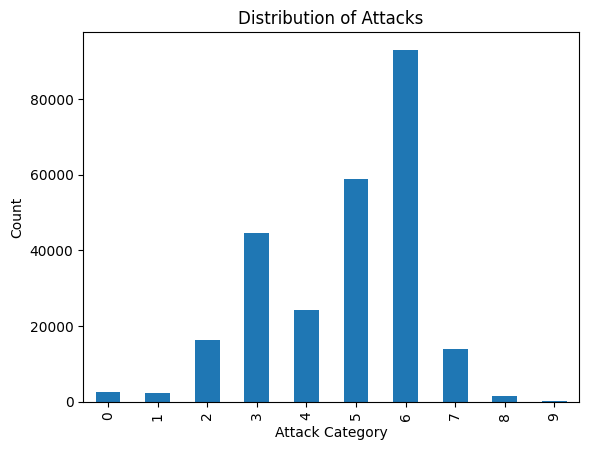

In [9]:
# prompt: want to see the bar plot wit respect to feature attack_cat with all features.

dataset.groupby(['attack_cat']).size().plot(kind='bar')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attacks')
plt.show()


In [10]:
# prompt: want to see the how many numbers of same values in attack_cat have for all values in numbers

print(dataset['attack_cat'].value_counts())


6    93000
5    58871
3    44525
4    24246
2    16353
7    13987
0     2677
1     2329
8     1511
9      174
Name: attack_cat, dtype: int64


In [11]:
# prompt: as we convert our categorical values of attack_cat using labelencoder, can i get whih number show which attack

encoder.classes_


array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [12]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()


Number of numerical variables:  42


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,1,3,0,0,0,2,3,0,6,0


In [14]:
# prompt: want to see the shape of the dataset

print(dataset.shape)


(257673, 45)


In [15]:
print(df.shape)

(257673, 45)


In [18]:
# list of numerical variables
cat_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

print('Number of Categorical variables: ', len(cat_features))

# visualise the numerical variables
dataset[cat_features].head()
dataset[cat_features].head()

Number of Categorical variables:  3


,proto,service,state
0,udp,-,INT
1,udp,-,INT
2,udp,-,INT
3,udp,-,INT
4,udp,-,INT


In [ ]:
cat_features

['proto', 'service', 'state']

In [19]:
for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is proto and number of categories are 133
The feature is service and number of categories are 13
The feature is state and number of categories are 11


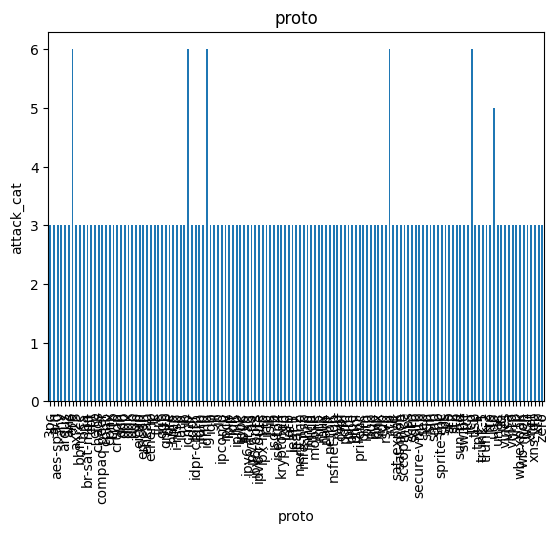

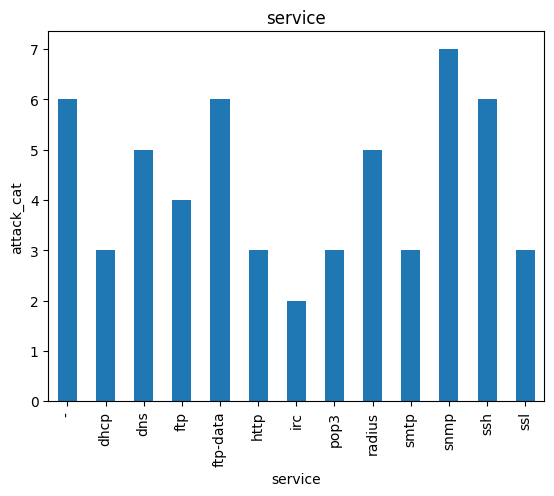

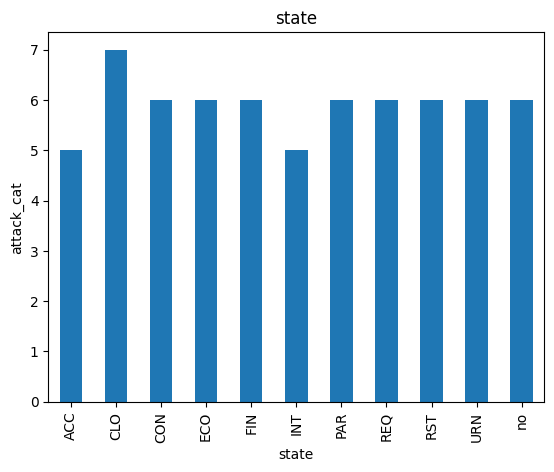

In [20]:
for feature in cat_features:
    data=dataset.copy()
    data.groupby(feature)['attack_cat'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('attack_cat')
    plt.title(feature)
    plt.show()

In [21]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in cat_features]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 12


In [22]:
discrete_feature

['sttl',
 'dttl',
 'swin',
 'dwin',
 'trans_depth',
 'ct_state_ttl',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [23]:
dataset[discrete_feature].head()

,sttl,dttl,swin,dwin,trans_depth,ct_state_ttl,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,254,0,0,0,0,2,0,0,0,0,6,0
1,254,0,0,0,0,2,0,0,0,0,6,0
2,254,0,0,0,0,2,0,0,0,0,6,0
3,254,0,0,0,0,2,0,0,0,0,6,0
4,254,0,0,0,0,2,0,0,0,0,6,0


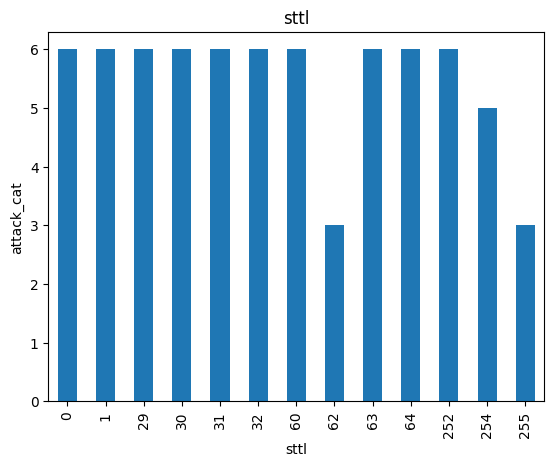

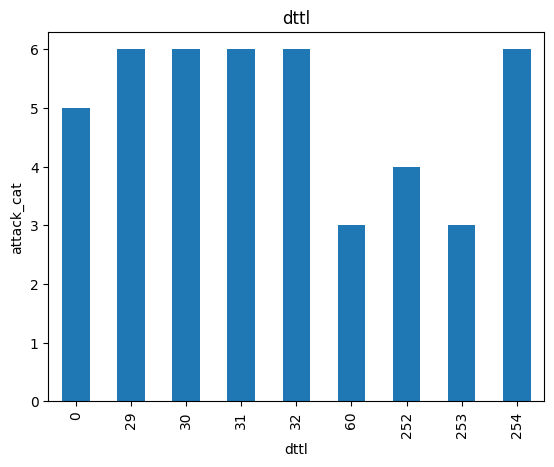

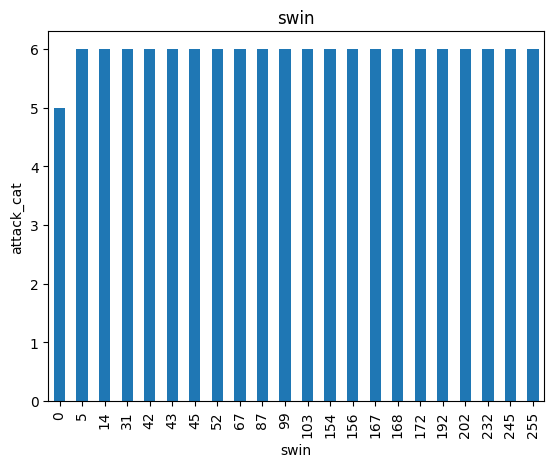

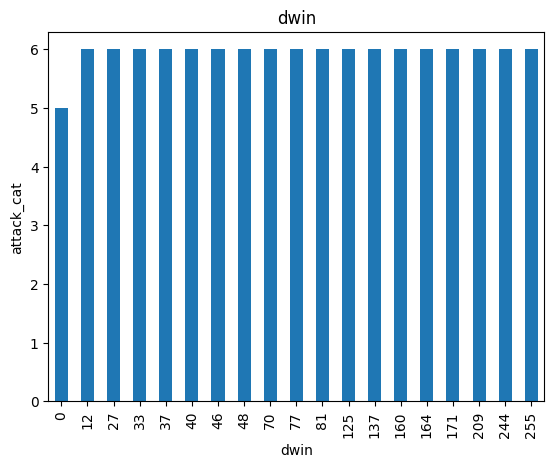

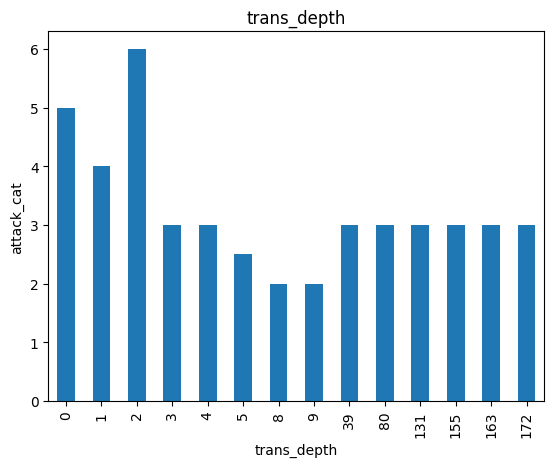

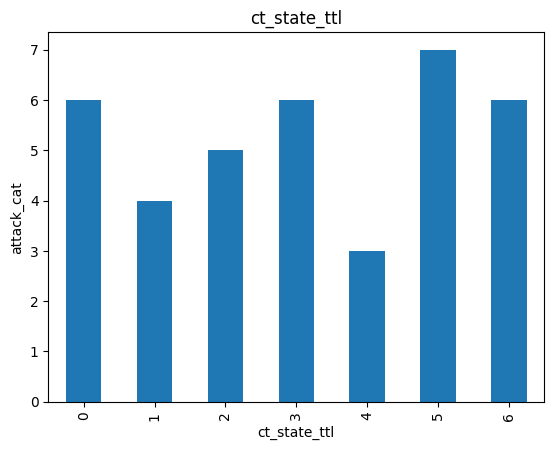

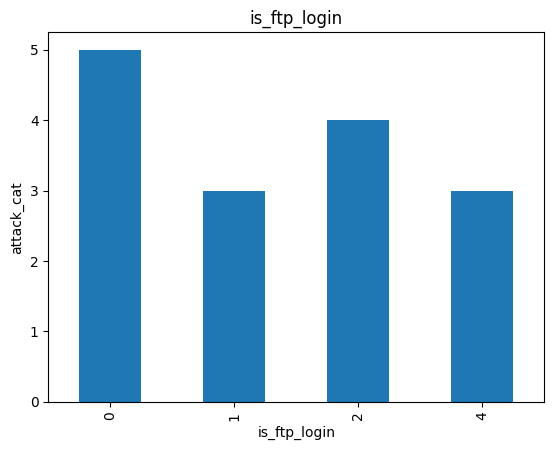

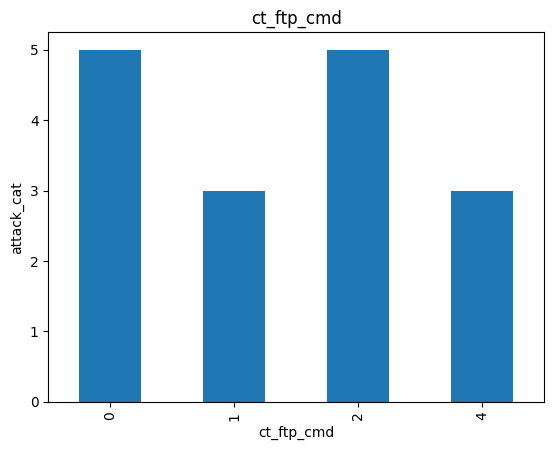

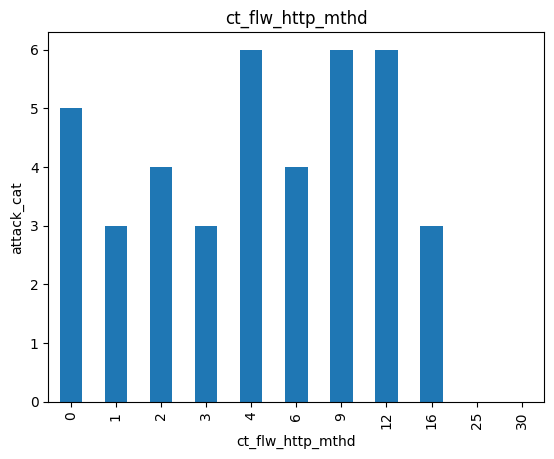

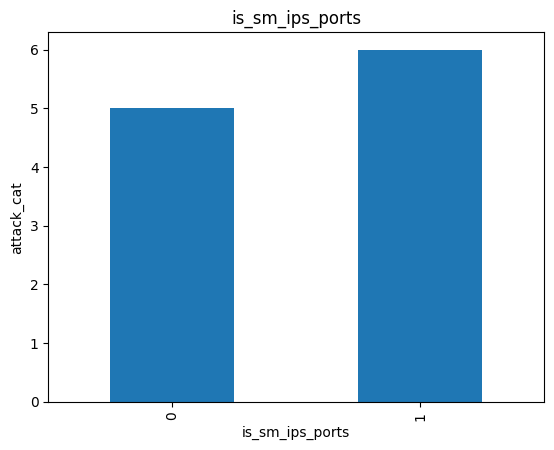

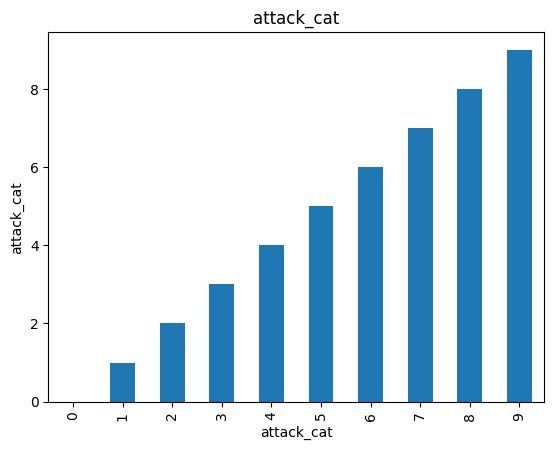

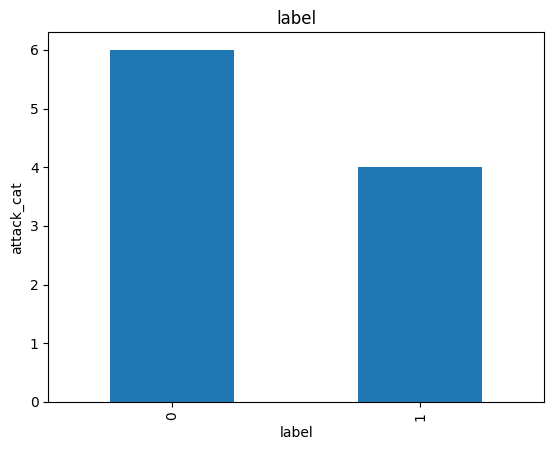

In [24]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['attack_cat'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('attack_cat')
    plt.title(feature)
    plt.show()

In [25]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+cat_features+['id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 29


In [26]:
continuous_feature

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'response_body_len',
 'ct_srv_src',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_srv_dst']

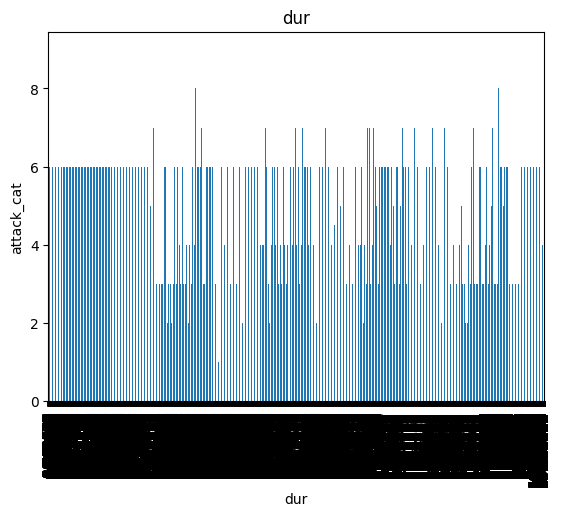

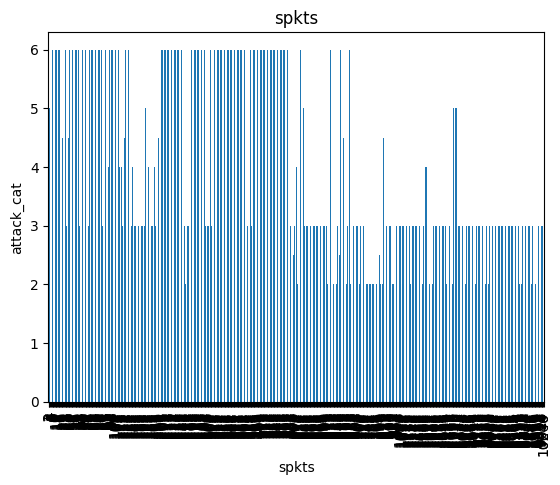

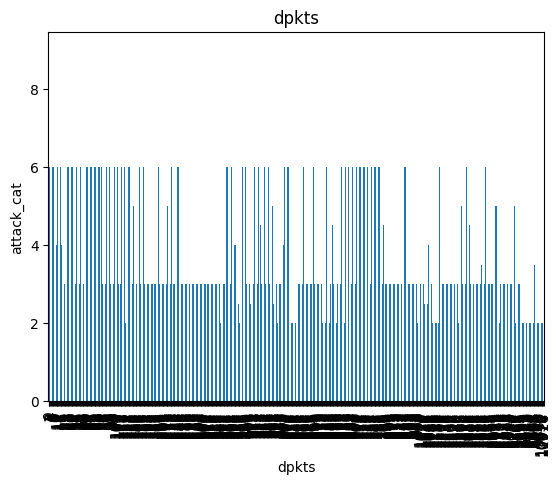

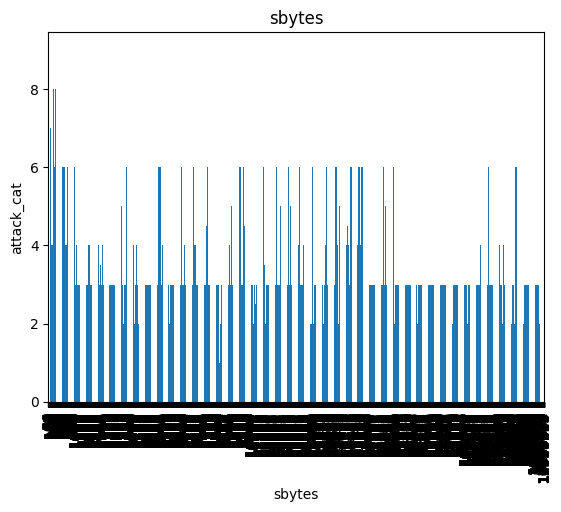

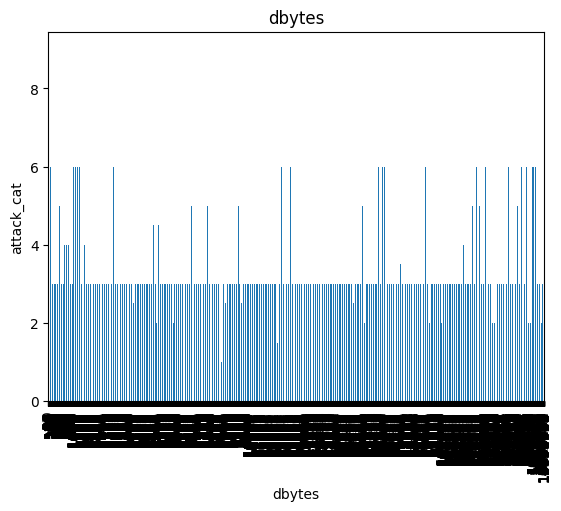

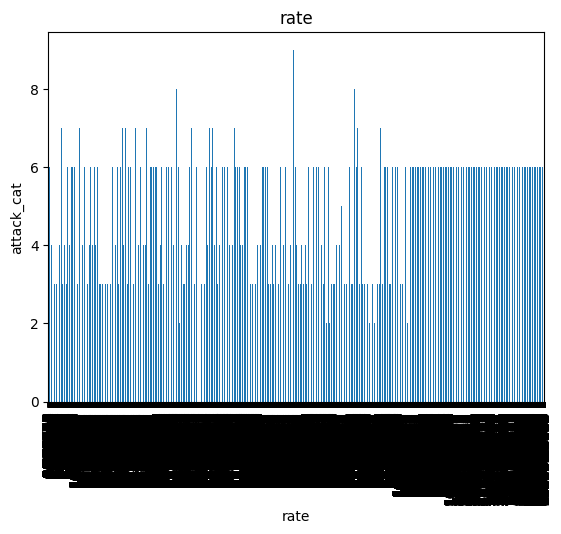

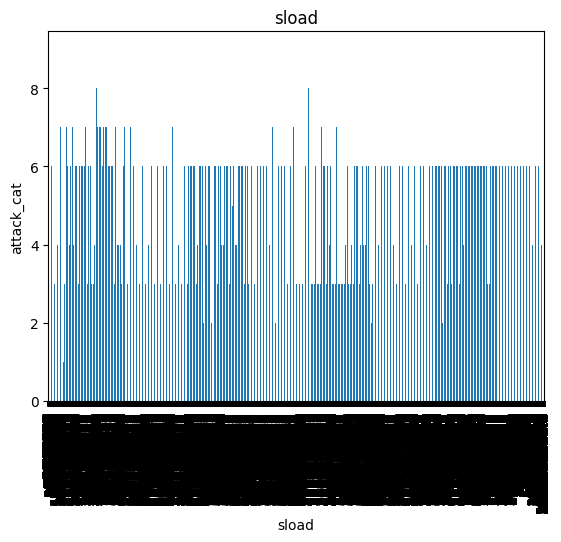

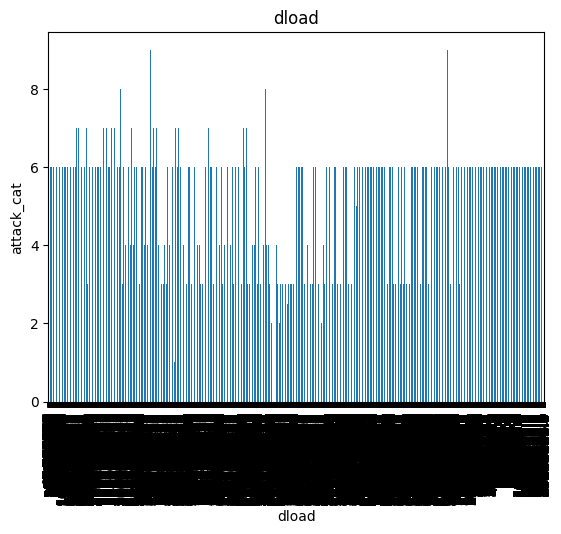

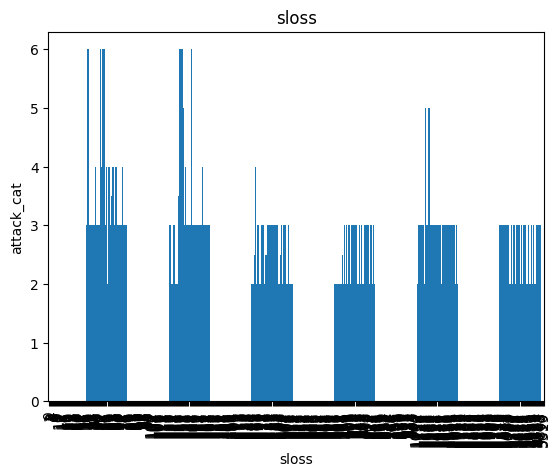

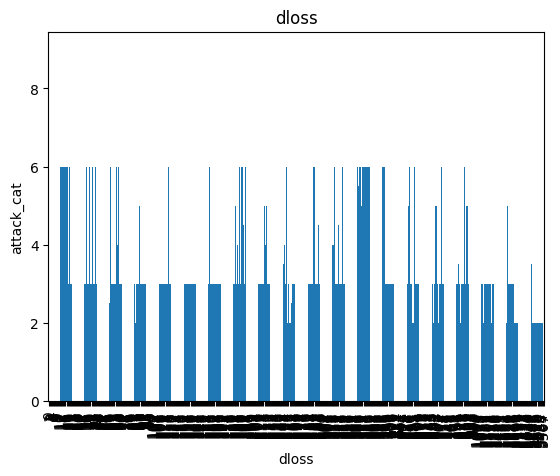

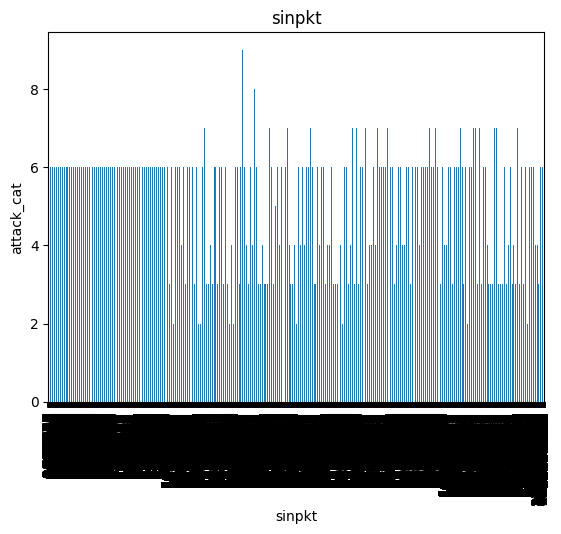

In [ ]:
## Lets Find the realtionship between them and Sale PRice

for feature in continuous_feature:
    data=dataset.copy()
    data.groupby(feature)['attack_cat'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('attack_cat')
    plt.title(feature)
    plt.show()

# Outliers

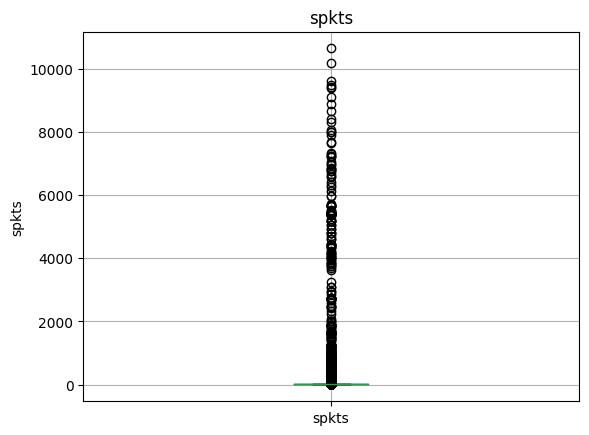

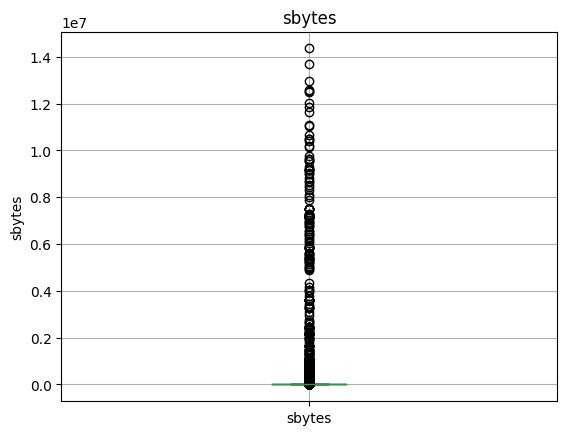

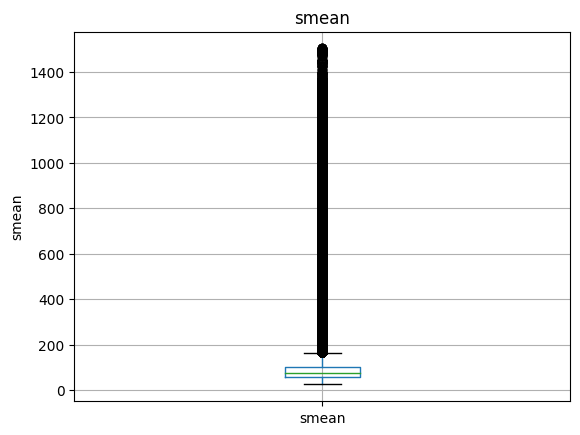

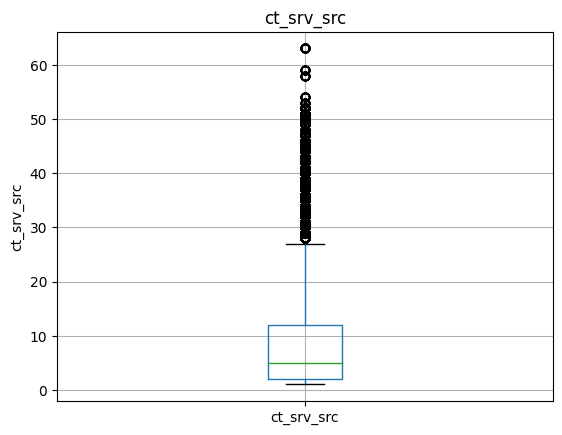

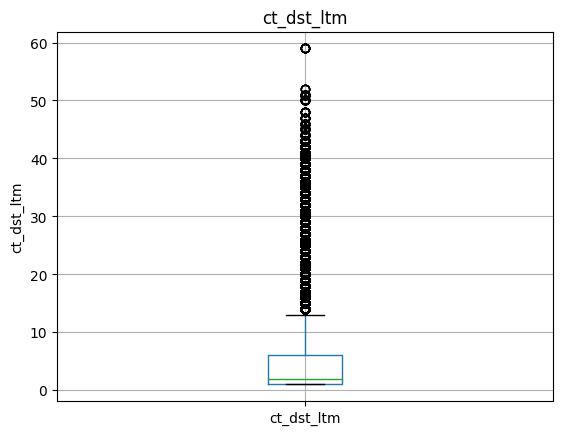

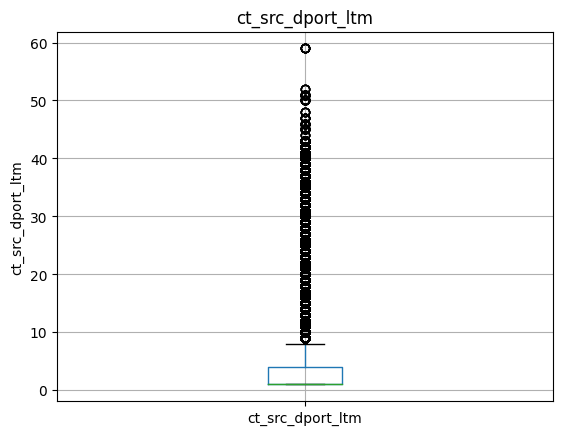

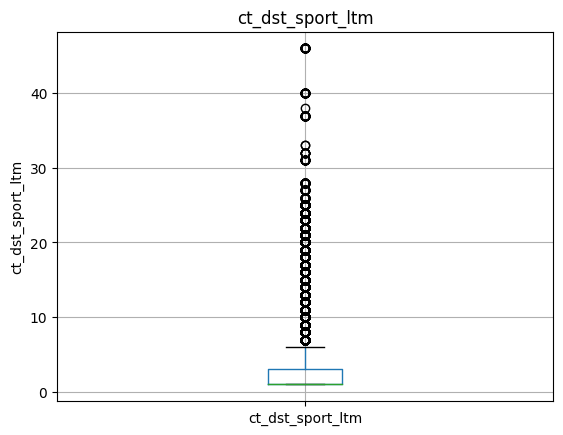

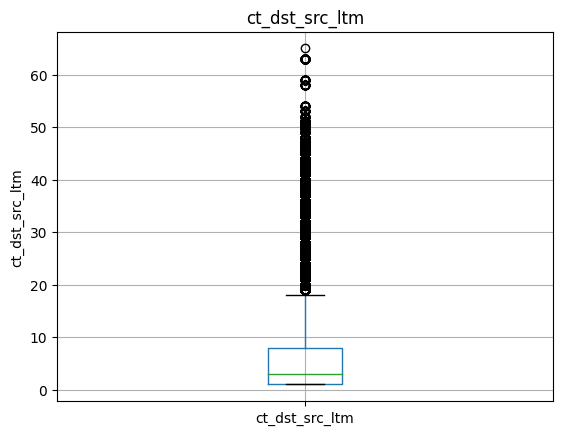

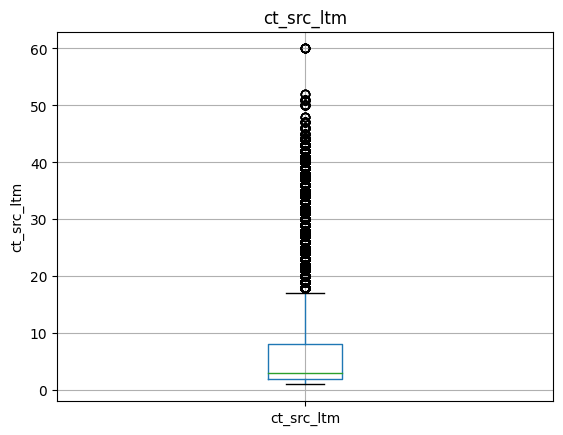

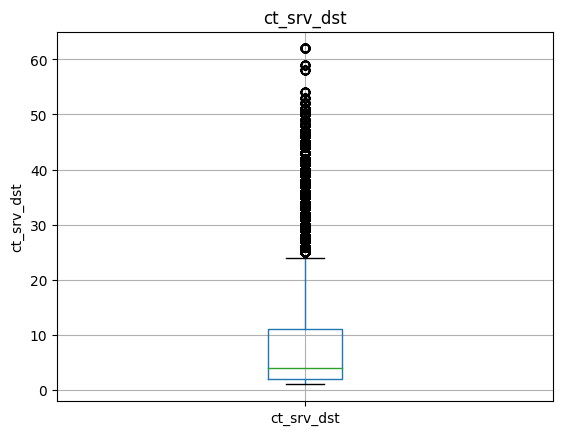

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [ ]:
for feature in discrete_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Feature Engineering Part



UNSW NB 15 Dataset- Feature Engineering
The main aim of this project is to Classify the Cyber Attacks on IoT



We will be performing all the below steps in Feature Engineering



*   Missing Values
*   Temporal Variables
*   Categorical variables: remove rare labels
*   Standarise the values of the variables to the same range






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# For feature engineering we can upload dataset here again as in the pipeline we do these sections in parallel
test_df = pd.read_csv('/content/drive/Shareddrives/CyberSecurity Dataset/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_test-set.csv')
train_df = pd.read_csv('/content/drive/Shareddrives/CyberSecurity Dataset/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
dataset = pd.concat([test_df, train_df], ignore_index=True)
# data = df
# dataset = data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['attack_cat'],test_size=0.1,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((231905, 45), (25768, 45))

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))
else:
  print('There is no missing value by default in the Dataset')

There is no missing value by default in the Dataset


As we have no missing value in the dataset so we don't need to run this piece of code

In [ ]:
'''
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()
'''

"\n## Replace missing value with a new label\ndef replace_cat_feature(dataset,features_nan):\n    data=dataset.copy()\n    data[features_nan]=data[features_nan].fillna('Missing')\n    return data\n\ndataset=replace_cat_feature(dataset,features_nan)\n\ndataset[features_nan].isnull().sum()\n"

In [ ]:
dataset.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,11.417615,5.537334,-inf,19.010486,0.0,0,0,-4.509860,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,248,0,-inf,0,2,0.693147,1,1,1,2,-inf,-inf,-inf,1,2,-inf,6,0
1,2,0.000008,udp,-,INT,2,0,1762,0,11.736069,5.537334,-inf,20.596568,0.0,0,0,-4.828314,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,881,0,-inf,0,2,0.693147,1,1,1,2,-inf,-inf,-inf,1,2,-inf,6,0
2,3,0.000005,udp,-,INT,2,0,1068,0,12.206073,5.537334,-inf,20.565910,0.0,0,0,-5.298317,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,534,0,-inf,0,3,0.693147,1,1,1,3,-inf,-inf,-inf,1,3,-inf,6,0
3,4,0.000006,udp,-,INT,2,0,900,0,12.023751,5.537334,-inf,20.212440,0.0,0,0,-5.115996,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,450,0,-inf,0,3,0.693147,2,2,1,3,-inf,-inf,-inf,2,3,-inf,6,0
4,5,0.000010,udp,-,INT,2,0,2126,0,11.512925,5.537334,-inf,20.561217,0.0,0,0,-4.605170,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,1063,0,-inf,0,3,0.693147,2,2,1,3,-inf,-inf,-inf,2,3,-inf,6,0


In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))
else:
  print('there is no missing value by default in the dataset')

there is no missing value by default in the dataset


In [ ]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()

    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)

dataset[numerical_with_nan].isnull().sum()

Series([], dtype: float64)

In [ ]:
dataset.head(25)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,11.417615,5.537334,-inf,19.010486,0.0,0,0,-4.509860,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,248,0,-inf,0,2,0.693147,1,1,1,2,-inf,-inf,-inf,1,2,-inf,6,0
1,2,0.000008,udp,-,INT,2,0,1762,0,11.736069,5.537334,-inf,20.596568,0.0,0,0,-4.828314,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,881,0,-inf,0,2,0.693147,1,1,1,2,-inf,-inf,-inf,1,2,-inf,6,0
2,3,0.000005,udp,-,INT,2,0,1068,0,12.206073,5.537334,-inf,20.565910,0.0,0,0,-5.298317,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,534,0,-inf,0,3,0.693147,1,1,1,3,-inf,-inf,-inf,1,3,-inf,6,0
3,4,0.000006,udp,-,INT,2,0,900,0,12.023751,5.537334,-inf,20.212440,0.0,0,0,-5.115996,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,450,0,-inf,0,3,0.693147,2,2,1,3,-inf,-inf,-inf,2,3,-inf,6,0
4,5,0.000010,udp,-,INT,2,0,2126,0,11.512925,5.537334,-inf,20.561217,0.0,0,0,-4.605170,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,1063,0,-inf,0,3,0.693147,2,2,1,3,-inf,-inf,-inf,2,3,-inf,6,0
5,6,0.000003,udp,-,INT,2,0,784,0,12.716898,5.537334,-inf,20.767602,0.0,0,0,-5.809143,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,392,0,-inf,0,2,0.693147,2,2,1,2,-inf,-inf,-inf,2,2,-inf,6,0
6,7,0.000006,udp,-,INT,2,0,1960,0,12.023751,5.537334,-inf,20.990745,0.0,0,0,-5.115996,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,980,0,-inf,0,2,0.693147,2,2,1,2,-inf,-inf,-inf,2,2,-inf,6,0
7,8,0.000028,udp,-,INT,2,0,1384,0,10.483306,5.537334,-inf,19.102334,0.0,0,0,-3.575551,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,692,0,-inf,0,3,0.693147,1,1,1,3,-inf,-inf,-inf,1,3,-inf,6,0
8,9,0.000000,arp,-,INT,1,0,46,0,-inf,-inf,-inf,-inf,0.0,0,0,11.002111,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,46,0,-inf,0,2,0.693147,2,2,2,2,-inf,-inf,-inf,2,2,0.0,6,0
9,10,0.000000,arp,-,INT,1,0,46,0,-inf,-inf,-inf,-inf,0.0,0,0,11.002112,0.0,0.0,0.0,-inf,0,0,-inf,0.0,0.0,0.0,46,0,-inf,0,2,0.693147,2,2,2,2,-inf,-inf,-inf,2,2,0.0,6,0


In [ ]:

import numpy as np
num_features=['rate', 'sttl', 'dttl', 'sload', 'sinpkt', 'swin', 'dwin', 'trans_depth', 'ct_state_ttl', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
cat_features

['proto', 'service', 'state']

In [ ]:
for feature in cat_features:
    temp=dataset.groupby(feature)['attack_cat'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

**Feature Scaling**

In [ ]:
for feature in cat_features:
    labels_ordered=dataset.groupby([feature])['attack_cat'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['label','attack_cat'] ]
len(scaling_feature)

43

In [ ]:
scaling_feature

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','label', 'attackcat']]

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset[feature_scale])
dataset[feature_scale] = scaler.fit_transform(dataset[feature_scale])

'''
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
'''

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
scaler.transform(dataset[feature_scale])

array([[-1.48811722, -0.24360924, -1.95048959, ..., -0.89895321,
        -1.13481596, -2.58980489],
       [-1.48811722, -0.24360932, -1.95048959, ..., -0.89895321,
        -1.13481596, -2.58980489],
       [-1.48811722, -0.24360941, -1.95048959, ..., -0.89049725,
        -1.13481596, -2.58980489],
       ...,
       [-1.48804399, -0.24360929, -1.95048959, ..., -0.8143936 ,
        -1.13481596, -3.0152881 ],
       [-1.48804399, -0.24360929, -1.95048959, ..., -0.6621863 ,
        -1.13481596, -3.0152881 ],
       [-1.48804399, -0.24360929, -1.95048959, ..., -0.6621863 ,
        -1.13481596, -3.0152881 ]])

In [ ]:
data = pd.concat([dataset[['label', 'attack_cat']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

,label,attack_cat,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0,0.801275,-1.488117,-0.243609,-1.95049,-2.590095,-1.456423,-0.146439,-0.166807,-0.049334,-0.09841,-0.569112,-1.749266,-0.758293,-0.380167,-0.27285,-0.075698,-0.127914,-0.131814,-0.090495,-0.110524,-0.148188,-0.963432,-0.73558,-0.734888,-0.944681,-5.82899,-8.593583,-11.174943,-0.665870,-0.480744,-0.346366,-0.039676,-0.929383,-0.64972,-0.815828,-0.705520,-0.780712,-0.799546,-1.061563,-1.058416,-0.477525,-0.892164,-0.898953,-1.134816,-2.589805
1,0,0.801275,-1.488117,-0.243609,-1.95049,-2.590095,-1.456423,-0.146439,-0.166807,-0.049334,-0.09841,-0.569111,-1.749266,-0.758293,-0.380167,-0.27285,-0.075698,-0.127914,-0.131814,-0.090495,-0.110524,-0.148188,-0.963432,-0.73558,-0.734888,-0.944681,-5.82899,-8.593583,-11.174943,-0.650939,-0.480744,-0.346366,-0.039676,-0.929383,-0.64972,-0.815828,-0.705520,-0.780712,-0.799546,-1.061563,-1.058416,-0.477525,-0.892164,-0.898953,-1.134816,-2.589805
2,0,0.801275,-1.488117,-0.243609,-1.95049,-2.590095,-1.456423,-0.146439,-0.166807,-0.049334,-0.09841,-0.569108,-1.749266,-0.758293,-0.380167,-0.27285,-0.075698,-0.127914,-0.131814,-0.090495,-0.110524,-0.148188,-0.963432,-0.73558,-0.734888,-0.944681,-5.82899,-8.593583,-11.174943,-0.659124,-0.480744,-0.346366,-0.039676,-0.920857,-0.64972,-0.815828,-0.705520,-0.780712,-0.791460,-1.061563,-1.058416,-0.477525,-0.892164,-0.890497,-1.134816,-2.589805
3,0,0.801275,-1.488117,-0.243609,-1.95049,-2.590095,-1.456423,-0.146439,-0.166807,-0.049334,-0.09841,-0.569109,-1.749266,-0.758293,-0.380167,-0.27285,-0.075698,-0.127914,-0.131814,-0.090495,-0.110524,-0.148188,-0.963432,-0.73558,-0.734888,-0.944681,-5.82899,-8.593583,-11.174943,-0.661105,-0.480744,-0.346366,-0.039676,-0.920857,-0.64972,-0.800860,-0.690505,-0.780712,-0.791460,-1.061563,-1.058416,-0.477525,-0.877979,-0.890497,-1.134816,-2.589805
4,0,0.801275,-1.488117,-0.243609,-1.95049,-2.590095,-1.456423,-0.146439,-0.166807,-0.049334,-0.09841,-0.569112,-1.749266,-0.758293,-0.380167,-0.27285,-0.075698,-0.127914,-0.131814,-0.090495,-0.110524,-0.148188,-0.963432,-0.73558,-0.734888,-0.944681,-5.82899,-8.593583,-11.174943,-0.646646,-0.480744,-0.346366,-0.039676,-0.920857,-0.64972,-0.800860,-0.690505,-0.780712,-0.791460,-1.061563,-1.058416,-0.477525,-0.877979,-0.890497,-1.134816,-2.589805
